# SKKU SWE3050-41, Homework 3, Question 5
## Linear Regression Implementation
In this task, we will apply multiple machine learning models to classify handwritten digits from the `sklearn.datasets.load_digits` dataset. This dataset contains 8×8 grayscale images of digits (0–9).

### A. Load and explore the data [5 pts]:
* Use the `load_digits()` function from sklearn.datasets.
* Display the shape of the feature matrix and target vector.
*	Optionally, visualize a few sample digits using matplotlib.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input


Feature matrix shape:  (1797, 64)
Target vector shape:  (1797,)


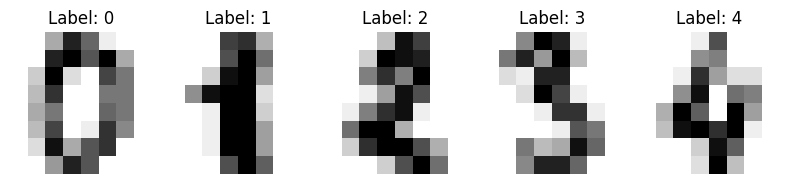

In [ ]:
digits = load_digits()
X = digits.data          # shape: (n_samples, 64)
y = digits.target        # shape: (n_samples,)

print("Feature matrix shape: ", X.shape)
print("Target vector shape: ", y.shape)

# optional: visualize some digits
fig, axes = plt.subplots(1, 5, figsize=(8, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap="gray_r")
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scaling for MLP & deep network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# plot confusion matrix
def plot_confusion_matrix(cm, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=np.arange(10))
    disp.plot(cmap="Blues", values_format="d")
    plt.title(title)
    plt.show()

### B. Train four classifiers [10 pts]:
* Model 1: Random Forest (RandomForestClassifier)
* Model 2: AdaBoost (AdaBoostClassifier)
* Model 3: Multilayer Perceptron (MLPClassifier from sklearn.neural_network)
* Model 4: Deep Neural Network using Keras (or PyTorch, if preferred)
  * Create a simple feedforward neural network with at least 3 hidden layers.
  * Use ReLU activations and SoftMax output layer.
  * Train for at least 20 epochs.


In [ ]:
# Model 1: Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

# Model 2: AdaBoost
ada = AdaBoostClassifier(
    random_state=42
)
ada.fit(X_train, y_train)

# Model 3: MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(64,),
    activation="relu",
    max_iter=300,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

# Model 4: Deep Neural Network (Keras)
dnn = Sequential(
    [
        Input(shape=(64,)), # 64 features from 8x8 image
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dense(10, activation="softmax"),  # 10 classes
    ]
)

dnn.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

history = dnn.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1,
)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3445 - loss: 2.0761 - val_accuracy: 0.7674 - val_loss: 1.0847
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8239 - loss: 0.8072 - val_accuracy: 0.9132 - val_loss: 0.4105
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9422 - loss: 0.2720 - val_accuracy: 0.9444 - val_loss: 0.2440
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9756 - loss: 0.1356 - val_accuracy: 0.9479 - val_loss: 0.2048
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9859 - loss: 0.0921 - val_accuracy: 0.9583 - val_loss: 0.1586
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9948 - loss: 0.0627 - val_accuracy: 0.9549 - val_loss: 0.1594
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9955 - loss: 0.0360 - val_accuracy: 0.9688 - val_loss: 0.1413
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.0232 - val_accuracy: 0.9688 - val_loss:

### C. Evaluate the models [10 pts]:
* Compute and display the accuracy for each model on the test data.
* Display the confusion matrix for each model.
* (Optional) Plot the training and validation loss for the deep learning model.



Random Forest Accuracy: 0.9638888888888889


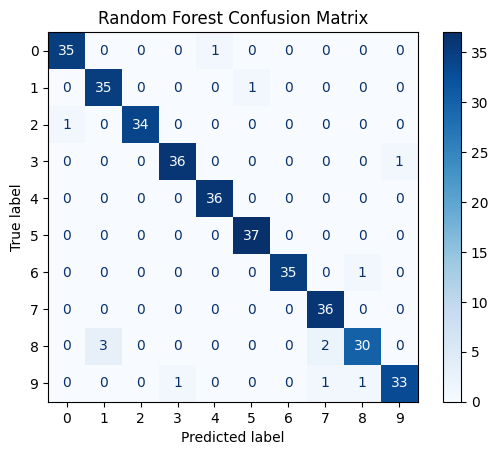


AdaBoost Accuracy: 0.7277777777777777


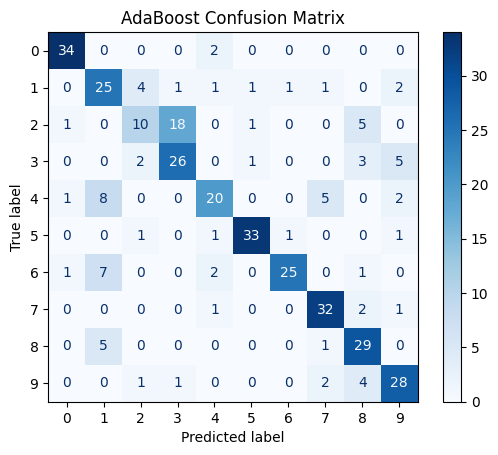


MLPClassifier Accuracy: 0.9805555555555555


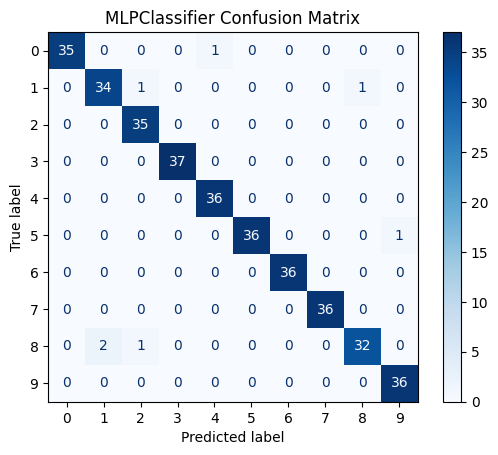

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Deep Neural Network (Keras) Accuracy: 0.975


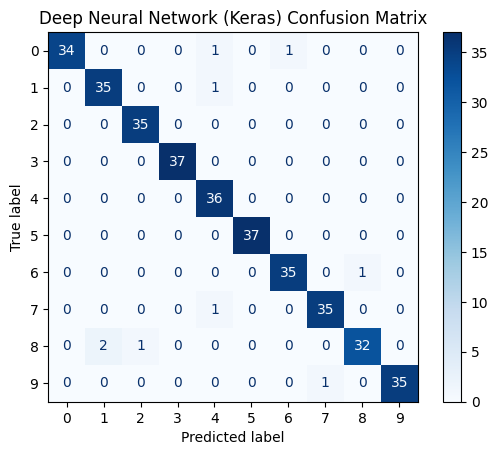

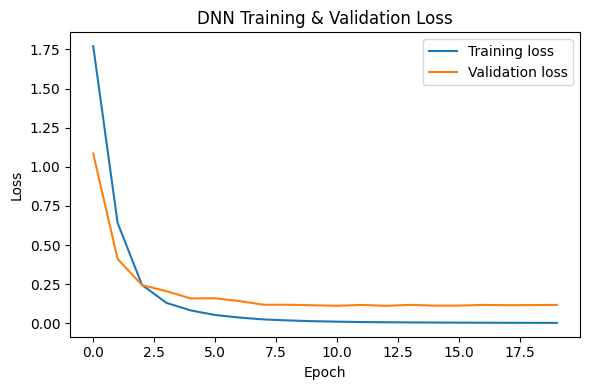


=== Model Accuracies ===
Random Forest            : 0.9639
AdaBoost                 : 0.7278
MLPClassifier            : 0.9806
Deep NN (Keras)          : 0.9750


In [ ]:
results = {}

# Random Forest
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
results["Random Forest"] = acc_rf

print("\nRandom Forest Accuracy:", acc_rf)
plot_confusion_matrix(cm_rf, "Random Forest Confusion Matrix")

# AdaBoost
y_pred_ada = ada.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada)
cm_ada = confusion_matrix(y_test, y_pred_ada)
results["AdaBoost"] = acc_ada

print("\nAdaBoost Accuracy:", acc_ada)
plot_confusion_matrix(cm_ada, "AdaBoost Confusion Matrix")

# MLPClassifier
y_pred_mlp = mlp.predict(X_test_scaled)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
results["MLPClassifier"] = acc_mlp

print("\nMLPClassifier Accuracy:", acc_mlp)
plot_confusion_matrix(cm_mlp, "MLPClassifier Confusion Matrix")

# Deep Neural Network (Keras)
y_proba_dnn = dnn.predict(X_test_scaled)
y_pred_dnn = np.argmax(y_proba_dnn, axis=1)
acc_dnn = accuracy_score(y_test, y_pred_dnn)
cm_dnn = confusion_matrix(y_test, y_pred_dnn)
results["Deep NN (Keras)"] = acc_dnn

print("\nDeep Neural Network (Keras) Accuracy:", acc_dnn)
plot_confusion_matrix(cm_dnn, "Deep Neural Network (Keras) Confusion Matrix")

# (optional) plot training & validation loss for DNN
plt.figure(figsize=(6, 4))
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("DNN Training & Validation Loss")
plt.legend()
plt.tight_layout()
plt.show()

# print a summary of accuracies
print("\n=== Model Accuracies ===")
for name, acc in results.items():
    print(f"{name:25s}: {acc:.4f}")

### D. Compare and discuss [10 pts]
#### **D1. Which model achieved the highest accuracy?**

According to the results, the MLPClassifier (a shallow neural network with one hidden layer of 64 units) achieved the highest accuracy at 0.9806 or **98.06%**.

#### **D2. Discuss possible reasons for the difference in performance (e.g., model complexity, bias-variance tradeoff, overfitting).**

##### **Model Complexity**

MLP Classifier & Deep Neural Networks

Both neural networks can learn complex nonlinear relationships in the data. The MLP did slightly better because the dataset is small with 64 features and approximately 1,800 training samples, which is easier to train. A deeper network may overfit or may not have enough data to utilize its full capacity. The MLP’s simpler architecture fits the dataset’s complexity almost perfectly.

Random Forest

Random forest performs strongly because it handles non-linear decision boundaries well, reduces variance using many trees, and works extremely well on small-to-medium tabular datasets like digits.

AdaBoost

This has significantly lower performance because:
* AdaBoost is sensitive to noise and misclassified samples.
* The digit dataset contains some ambiguous or unclear digits.
* Weak learners (decision stumps) may not capture the image complexity effectively.

##### **Bias-Variance Tradeoff**

* Random Forest has low variance due to averaging many trees and moderate bias, making it reliable but slightly limited compared to neural networks.
* MLPClassifier hits a good balance due to low bias, moderate variance, and enough regularization via early stopping and scaling.
* Deep Neural Network has very low bias but higher variance with small datasets, deeper networks may overfit. Validation loss curves often show slight overfitting near 20 epochs.
* AdaBoost has very high variance and low tolerance for noise, which explains poor performance here.

##### **Dataset Size & Feature Space**

The digits dataset is small(~1,800 training samples), low-dimensional (64 features), and well-separated for most digits. Because of this, deep neural networks do not gain much advantage from depth, shallow and classical models (MLP, RF) handle the data efficiently, and boosting struggles because the base learners are too simple for image-like data.